<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/13.Image%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augmentation  

- 기존 이미지에 추가적인 특징들을 부여하는 것
- 좌우 반전, 스케일 늘리거나 줄임, 각도 약간 회전 등...

## 이미지 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 채널(C) 이 없으므로 axis 추가
X_train = X_train[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [ ]:
image = X_train[0]
image.shape

(28, 28, 1)

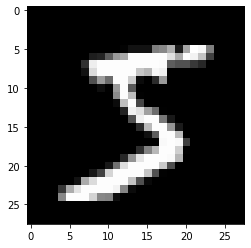

In [ ]:
plt.imshow(image[..., 0], 'gray')
plt.show()

## ImageDataGenerator 사용하기

이미지에 Augmentation을 넣기 위한 클래스  

`ImageDataGenerator` 클래스의 객체를 만들어 놓고, 이미지를 흘려주는 (flow) 방식

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# step 1. Augmentation 설정
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True # 좌우 반전
)

step 2. Augmentation 을 주기 위해서는 **데이터의 형식**을 CNN 레이어에 들어가는 형식으로 맞춰줘야 함  

**`(N, H, W, C)`** 유지

In [ ]:
X_train.shape

(60000, 28, 28, 1)

이미지 한 장만 augmentation 하려면?

In [ ]:
inputs = X_train[0]
inputs.shape

(28, 28, 1)

In [ ]:
inputs = inputs[tf.newaxis, ...]
inputs.shape

(1, 28, 28, 1)

step 3. ImageDataGenerator에 이미지 흘리기(flow)

In [ ]:
datagen.flow(inputs)

---> 흘려보낸 결과물이 NumpyArrayIterator 형식으로 나오게 됨  

step 4. Iterator를 강제로 움직여서 Augmentation된 이미지 꺼내보기

In [ ]:
img_iterator = datagen.flow(inputs)
image = next(iter(img_iterator))

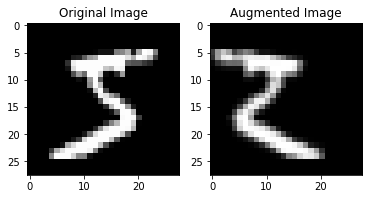

In [ ]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')  # squeeze : 값이 1인 차원을 없앰
plt.title("Original Image")

plt.subplot(122)
plt.imshow(np.squeeze(image), 'gray')
plt.title("Augmented Image")

plt.show()

### ImageDataGenerator 의 변형 옵션

* width_shift_range : 좌우 이동 범위 설정
* height_shift_range : 상하 이동 범위 설정
* brightness_range : 밝기 조절 설정
* zoom_range : 확대 / 축소 범위 설정
* horizontal_flip : 좌우반전 여부( bool )
* vertical_flip : 상하반전 여부( bool )
* **rescale : 픽셀 전처리 단위 설정** ( 정규화 )
* preprocessing_function : opencv 등 외부 라이브러리를 이용한 전처리 할 때 사용

---

**rescale** 시 주의 사항  
`train_data_gen` 에 rescale을 했으면, `test_data_gen`에도 **반드시** 같은 옵션으로 rescale 해야 함

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.  # 픽셀 단위를 1/255로 하겠다
)

# train에 rescale 했으면 !!반드시!! test에도 똑같은 옵션으로 rescale 해야 함
test_datagen = ImageDataGenerator(
    rescale=1./255.
)